In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

C:\Users\Prajakta Pardeshi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


we will generate random data points and define a linear relation, we'll use TensorFlow to adjust and get the right parameters.

In [2]:
x_data = np.random.rand(100).astype(np.float32)

In [3]:
x_data

array([0.83790094, 0.88431644, 0.45077452, 0.5852686 , 0.02014722,
       0.481875  , 0.2239878 , 0.07187194, 0.6941896 , 0.8159978 ,
       0.44049546, 0.06441409, 0.27912807, 0.5287273 , 0.35300365,
       0.65532875, 0.7968739 , 0.0483299 , 0.83766127, 0.34765977,
       0.45818618, 0.19027099, 0.33308855, 0.5103975 , 0.19899686,
       0.6732592 , 0.6233599 , 0.81559837, 0.12978968, 0.41784173,
       0.6911893 , 0.04803126, 0.11972558, 0.77861327, 0.343459  ,
       0.7919025 , 0.22991881, 0.43229294, 0.80805445, 0.26328552,
       0.46125785, 0.97450215, 0.6420018 , 0.47727254, 0.81117266,
       0.72479904, 0.74876887, 0.500342  , 0.8093307 , 0.2425764 ,
       0.9396131 , 0.47699726, 0.67774767, 0.99715763, 0.68333   ,
       0.78415364, 0.6762395 , 0.21833438, 0.33008537, 0.8660605 ,
       0.40398955, 0.9986053 , 0.26035094, 0.16623257, 0.59387094,
       0.3955934 , 0.5084917 , 0.39966315, 0.31474698, 0.9859409 ,
       0.25535983, 0.43436968, 0.41284826, 0.05964472, 0.67240

In [4]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

Using linear regression equation

In [7]:
y_data

array([4.38422944, 4.75562585, 3.34876493, 3.8813052 , 2.02844473,
       3.41678412, 2.50940182, 2.19236257, 4.11250241, 4.34056191,
       3.41980003, 2.2892471 , 2.83743446, 3.55006757, 3.06250488,
       3.94867389, 4.29577163, 2.21268477, 4.63497541, 3.01921658,
       3.38091619, 2.47414116, 2.9084338 , 3.59579841, 2.70142612,
       4.05583142, 3.92643702, 4.34324534, 2.46187874, 3.16307881,
       4.05419385, 2.22231803, 2.37894803, 4.27805348, 3.0577853 ,
       4.43280176, 2.87438327, 3.05606846, 4.17424094, 2.70107138,
       3.45426803, 4.88973622, 3.85560155, 3.34111715, 4.37413563,
       4.32938958, 4.26075411, 3.55555255, 4.41057433, 2.73673732,
       4.66994751, 3.55602372, 4.02440881, 5.07053464, 4.07054533,
       4.35040895, 4.09056485, 2.92172268, 3.12772351, 4.7923451 ,
       3.28198964, 5.06688837, 2.73073304, 2.72425112, 3.88228674,
       2.94056259, 3.23817817, 3.13618033, 3.0741931 , 4.97524113,
       2.78432011, 3.45757704, 3.28241023, 2.28412472, 4.08271

First, we initialize the variables a and b, with any random guess, and then we define the linear function:

In [8]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In a linear regression, we minimize the squared error of the equation that we want to adjust minus the target values (the data that we have), so we define the equation to be minimized as loss.
To find Loss's value, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.

In [10]:
loss = tf.reduce_mean(tf.square(y - y_data))

Then, we define the optimizer method. Here we will use a simple gradient descent with a learning rate of 0.5: 

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the tf.train.GradientDescentOptimizer.
.minimize()__ will minimize the error function of our optimizer, resulting in a better model.

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Don't forget to initialize the variables before executing a graph:

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:

In [13]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [1.0, 0.2]
5 [2.4262166, 2.306888]
10 [2.552579, 2.239868]
15 [2.6490326, 2.1977777]
20 [2.7209618, 2.157323]
25 [2.7746062, 2.1271522]
30 [2.8146138, 2.104651]
35 [2.844451, 2.0878696]
40 [2.8667035, 2.0753543]
45 [2.8832994, 2.0660203]
50 [2.8956764, 2.0590591]
55 [2.904907, 2.0538678]
60 [2.911791, 2.049996]
65 [2.9169252, 2.0466256]
70 [2.9207544, 2.0449548]
75 [2.9240873, 2.0430803]
80 [2.9257398, 2.042151]
85 [2.927328, 2.0412576]
90 [2.9285126, 2.04048]
95 [2.929396, 2.0400114]


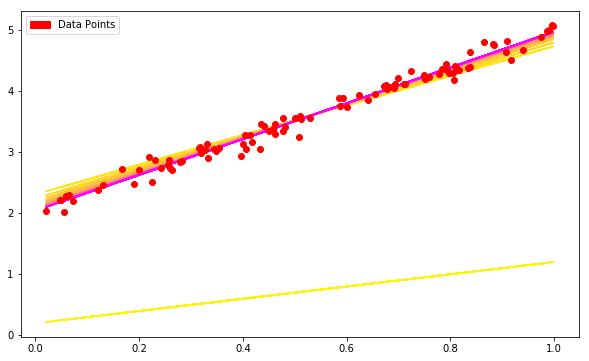

In [14]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()